<a href="https://colab.research.google.com/github/joseluisfalla/QA_JFALLA/blob/main/assignment_1/introduction_to_qiskit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# First of all, we need to make sure we install the Qiskit library on our Jupyter notebook before we can begin.
# You can use the syntax %pip install <library> to install libraries on your Jupyter environment.
!pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 51.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 84.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 5.4 MB/s eta 0:00:00


In [3]:
# Now, throughout this course, we'll be using simulators to run our circuits.
# It doesn't really make sense to use real quantum hardware, as the queuing times are inconvenient.
# For our simulations, we'll be using qiskit-aer, a package for quantum computing simulators
# with realistic noise models that provides different simulation methods.
!pip install qiskit_aer
%pip install pylatexenc

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=e31d3a4c56fd48a6a50dcffdbfe4aa795cbbd529be47f621202b436792535239
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc


Note that the way I've installed these libraries is in violation to PEP8 standards. All installations and imports (to follow) should be placed in the same block of code.

In [4]:
# Now that we've downloaded the libraries, we can import them (along with some other useful ones) into our notebook.
import numpy as np
from matplotlib import pyplot as plt
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import Aer

In [5]:
# In the natural order of things, we begin by defining (instantiating) our circuit.
qc = QuantumCircuit(4) # A quantum circuit with 4 qubits. This circuit only contains a quantum register; we'll eventually work with circuits with classical registers.

Useful tip: if you forget what the input for any function is and you don't want to go digging in the documentation, you can always use the syntax *function?*, and a help bar with appear on the left-hand side with information about the function's attributes (try it out below).

In [ ]:
QuantumCircuit?

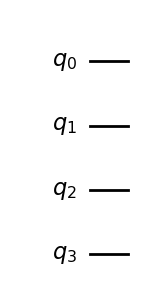

In [ ]:
# Qiskit allows us to visualize our circuit (that's why we needed to install pylatexenc--see installs)
qc.draw('mpl')

Fig 1. Visualization of a Qiskit circuit composed of a 4-qubit register. By default, all qubits are initialized to the computational state |0>.

*NB. Here's an example of how all figures should be captioned in your notebook.*

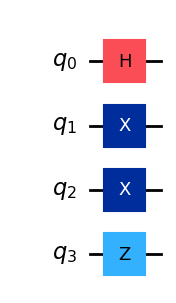

In [ ]:
# We can act on these qubits with a series of quantum gates now. We'll use some well-known single-qubit gates: The Hadamard gate and the X, Z Pauli gates.
# We can go about this a couple of ways.
# First way:
from qiskit.circuit.library import HGate, XGate, ZGate
hadamard_gate = HGate()
x_gate = XGate()
z_gate = ZGate()

qc = QuantumCircuit(4)

qc.append(hadamard_gate, [0]) # with qc.append() the first input is the gate you wish to apply, and the second input is the qubits you want to act on.
qc.append(x_gate, [1])
qc.append(x_gate, [2])
qc.append(z_gate, [3])

# Visualize the circuit now
qc.draw('mpl')

### The Hadamard Gate

Even though you haven't seen the Hadamard gate in lecture yet, it is one of the most widely used single-qubits gates. The purpose of the Hadamard gate is to create superposition (a very important quantum resource). Another way to think about the Hadamard gate is as a gate that changes basis from the $$|0\rangle, |1\rangle$$ basis to the $$|+\rangle, |-\rangle$$ basis, and vice-versa. The matrix representation of this gate is
$$H = \frac{1}{\sqrt{2}}\begin{pmatrix}
                  1 & 1\\
                  1 & -1
\end{pmatrix}$$



 In the computational basis (i.e. |0>, |1> basis), this gate acts as follows:

$$H|0\rangle = \frac{|0\rangle + |1\rangle}{\sqrt{2}} = |+\rangle$$
$$H|1\rangle = \frac{|0\rangle - |1\rangle}{\sqrt{2}} = |-\rangle$$

You can find more information about the Hadamard gate on Qiskit [here](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.HGate).

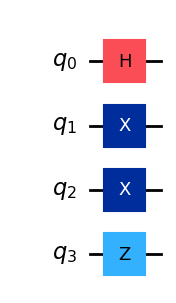

In [ ]:
# Here's the second way to do it (which I personally prefer, you'll see why).
qc = QuantumCircuit(4)

qc.h(0)
qc.x(1)
qc.x(2)
qc.z(3)

qc.draw('mpl')

As you can see, both methods give us the same circuit. Qiskit's circuit library is quite extensive, [here](https://docs.quantum.ibm.com/guides/circuit-library) you can find a comprehensive list of the quantum gates at your disposal, including two- and multi-qubit gates.

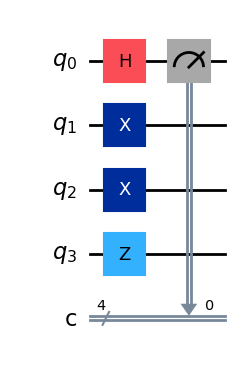

In [ ]:
# Usually, after constructing our circuit, we'll want to run it and look at the results.
# Before we can run the circuit though, we have to specify our measurement.
# There a couple of measurement methods. We'll take a look at both.

# First, mesuring individual qubits. In order to measure individual qubits, we have to instantiate our circuit with both a classical and a quantum register.
qc = QuantumCircuit(4, 4) # 4 qubits, 4 classical bits

# Apply gates
qc.h(0)
qc.x(1)
qc.x(2)
qc.z(3)

# Define measurement
qc.measure(0, 0) # Measures qubit 0 and puts the result in bit 0
qc.draw('mpl')

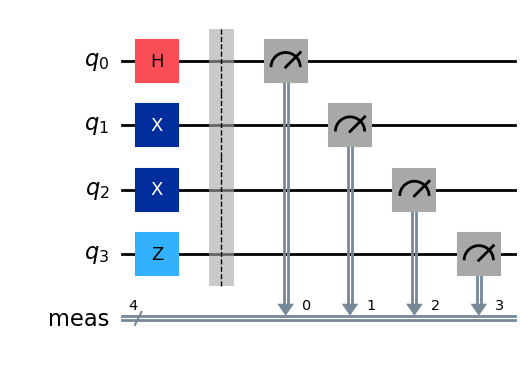

In [ ]:
# More often that not, we'll perform a measurement on all qubits
qc = QuantumCircuit(4)

# Apply gates
qc.h(0)
qc.x(1)
qc.x(2)
qc.z(3)

# Define measurement
qc.measure_all()
qc.draw('mpl')

Notice that for the measure_all() method it is not necessary to create a classical register when instatiating QuantumCircuit; Qiskit automatically creates a classical register with the same number of bits as qubits.

In [ ]:
# Now we're ready to define our simulator and run the circuit.
# First, choose a backend:
backend = Aer.get_backend('statevector_simulator')
job = backend.run(transpile(qc, backend), shots=1024) # An intermediate transpilation step is needed to run the job. The number of shots refers to how many times we run the circuit.
result = job.result() # Get the results

You can find a list of Aer simulator methods [here](https://qiskit.github.io/qiskit-aer/tutorials/1_aersimulator.html).
Also, [here](https://docs.quantum.ibm.com/guides/transpile)'s a page that explains what transpilation is and why it is necessary.

In [ ]:
# Let's look at the results.
result

Result(backend_name='statevector_simulator', backend_version='0.16.1', qobj_id='', job_id='1ca96b0d-87ee-435c-9d8e-1275eda7d67f', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x7': 497, '0x6': 527}, statevector=Statevector([ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j,
              0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
             -0.+0.j, -0.+0.j],
            dims=(2, 2, 2, 2))), header=QobjExperimentHeader(creg_sizes=[['meas', 4]], global_phase=0.0, memory_slots=4, n_qubits=4, name='circuit-167', qreg_sizes=[['q', 4]], metadata={}), status=DONE, seed_simulator=1286980308, metadata={'time_taken': 0.021976543, 'num_bind_params': 1, 'parallel_state_update': 1, 'required_memory_mb': 1, 'input_qubit_map': [[3, 3], [2, 2], [1, 1], [0, 0]], 'method': 'statevector', 'device': 'CPU', 'num_qubits': 4, 'active_input_qubits': [0, 1, 2, 3], 'num_clbits': 4, 'remapped_qubits': False, '

All the information about the run is here. When running quantum circuits, one of the things we want to look at is at the counts we get for each of the measurements. Let's look at that now.

In [ ]:
counts = result.get_counts()
counts

{'0111': 497, '0110': 527}

Here we see that out of the 2^4 possible bitstrings, we only get counts for two bitstrings. Why is this?

**Answer here in a few words.**

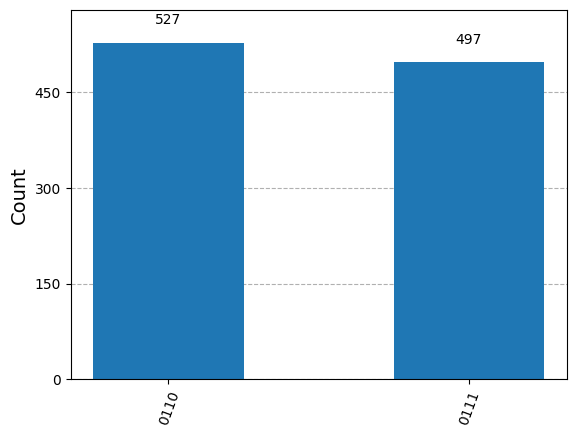

In [ ]:
# Let's visualize these results
plot_histogram(counts)

Fig 2. Histogram of counts obtained from running our quantum circuit. The histogram shows the two possible outcomes of the circuit.

*NB. While it is conventional to read bitstrings from left to right, the leftmost bit representing the measurement on qubit 0, Qiskit inverts this order. Therefore, when using Qiskit, the measurement of the first qubit corresponds to the rightmost bit, etc.*

## Now, let's play around with constructing circuits.

- First, construct a 4-qubit circuit and apply a set of **both single- and double-qubit gates**.
- Now, choose a single qubit in the circuit to perform a measurement on. Plot a histogram with the results.
- Perform now a measurement on all qubits. Plot a histogram of the results.
- Is there agreement in the single qubit measurement when comparing that qubit when you measure all qubits? Why or why not?

In [ ]:
# Your code here


## Measurements in Different Bases

So far, we've only performed measurements in the computational basis. Let's look at what happens when we change the measurement basis.

In [6]:
# First, let's define our original circuit once again
qc = QuantumCircuit(4)

# Apply gates
qc.h(0)
qc.x(1)
qc.x(2)
qc.z(3)

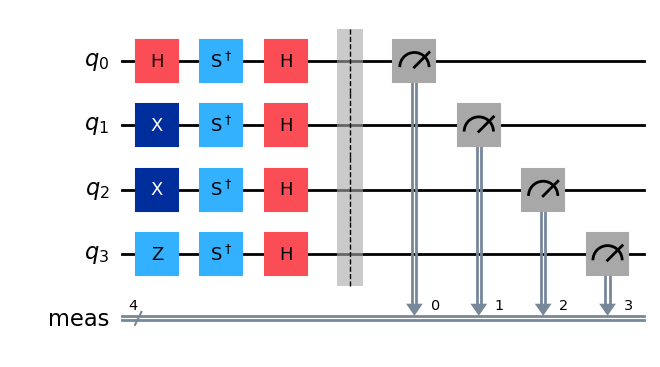

In [7]:
# Even though it's not a very common basis, I'll perform a measurement in the y-basis (also referred to as the circlar basis).
# For reference, the z-basis is commonly referred to as the computational basis, and the x-basis as the Hadamard basis.

# In order to change basis, I first need to act on my qubits to change them to my desired basis prior to performing a measurment.
# For the circular basis, we need to act with the S-adjoint gate, followed by the Hadamard gate.

for i in range(4):
  qc.sdg(i)
  qc.h(i)

# Now I can add the measurement
qc.measure_all()
qc.draw('mpl')

You can find more information about the S-adjoint gate [here](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.SdgGate).

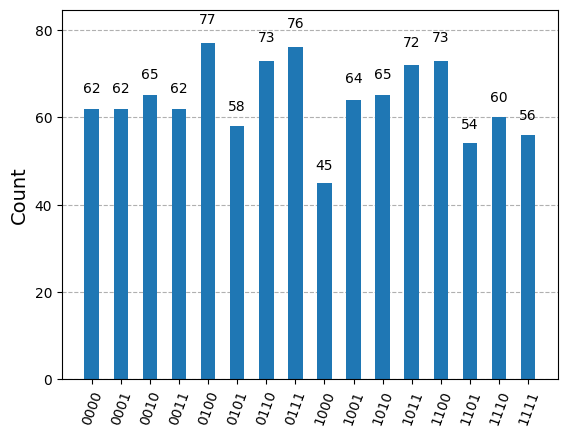

In [9]:
# Now let's run and visualize the results (if you already defined the backend previously, no need to do it again)
backend = Aer.get_backend('statevector_simulator')
job = backend.run(transpile(qc, backend), shots=1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

Fig 3. Resulting counts of running our quantum circuit and performing measurements in the circular basis. Now we see many more possible bitstrings arise under measurements in this new basis.

## Performing measurements in the Hadamard basis

- Create a random circuit (you can use one from the previous sections).
- Measure all qubits in the Hadamard basis.
- Now, go about it a different way: first, initialize your state in the Hadamard basis (Hint: make your initial state a uniform superposition state.)
- Apply the same circuit to this superposition state as you did in the previous part.
- Now measure in the computational basis.
- Plot the histograms side by side for these two cases. Explain what you see.

In [ ]:
# Your code here
